# **Experiment**: full algorithm of concent from smudged ground truth 4.1

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC3.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC3.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

In [2]:
# Experiment parameters
vol_smudge = 10
mr_repeat = 2 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 2048 # 5000  # [512, 1024, 2048, 4096, 8192]
J0 = 15

# durations
# SNR16_L129_N8192_J6_r2_sX_i3 -> 10h
# SNR16_L129_N8192_J6_r1_sX_i3 -> 1.5h
# SNR16_L129_N2048_J6_r2_sX_i5 -> per iter: 1h data_discr/2min rest | tot: 5h20m
max_iter = 10

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC3" , postfix="SNR{}_N{}_J{}_r{}_s{}_i{}".format(int(1/snr), num_imgs, J0, mr_repeat, vol_smudge, max_iter))
# exp.begin(prefix="expC3" , postfix="SNR{}_L{}_N{}_J{}_r{}_s{}_i{}_t{}_tt{}".format(int(1/snr), img_size, num_imgs, J0, mr_repeat, vol_smudge, max_iter, int(-np.log(tau1)/np.log(10)), int(-np.log(tau2)/np.log(10)) ))
exp.dbglevel(4)

2022-05-04 16:53:46,199 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC3_22-05-04_16-53-46_SNR16_N2048_J15_r2_s10_i10


In [3]:
# Set data path
data_dir = "data"
# data_filename = "clean70SRibosome_vol_65p.mrc"
data_filename = "waving_spike_state22_91p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
results_dir = "results"
# results_folder = "expC3_22-03-01_22-57-37_SNR16_L129_N2048_J6_r2_s10_i10"  # ribosomal 70s
# results_folder = "expC3_22-03-15_11-29-31_SNR16_N2048_J6_r2_s10_i2"  # spike protein
results_folder = "expC3_22-04-06_23-59-48_SNR16_N2048_J15_r2_s10_i10"  # spike protein
results_path = os.path.join("..", "..", "..", "..",results_dir,results_folder)

In [4]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               mr_repeat=mr_repeat,
               J0=J0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-04-07 10:20:00,329 INFO Start Experiment
2022-04-07 10:20:00,332 INFO Running Experiment for SNR = 0.0625 and 2048 images
2022-04-07 10:20:00,334 INFO This experiment illustrates orientation refinement using a lifting approach
2022-04-07 10:20:00,344 INFO Load 3D map and downsample 3D map to desired grids of 91 x 91 x 91.
2022-04-07 10:20:00,346 INFO Initialize simulation object and CTF filters.
2022-04-07 10:20:00,374 INFO Use downsampled map to creat simulation object.
2022-04-07 10:20:00,415 INFO Get true rotation angles generated randomly by the simulation object.
2022-04-07 10:20:01,972 INFO Trying NFFT backend finufft
2022-04-07 10:20:01,979 INFO NFFT backend finufft usable.
2022-04-07 10:20:01,980 INFO Trying NFFT backend cufinufft
2022-04-07 10:20:01,983 INFO NFFT backend cufinufft not usable:
	No module named 'pycuda'
2022-04-07 10:20:01,984 INFO Trying NFFT backend pynfft
2022-04-07 10:20:01,986 INFO NFFT backend pynfft not usable:
	No module named 'pynfft'
2022-04-07 10

2022-04-07 10:37:37,969 INFO Computing data fidelity for 114564 rotations and 2048 images at 59%
2022-04-07 10:37:52,652 INFO Computing data fidelity for 114564 rotations and 2048 images at 60%
2022-04-07 10:38:07,246 INFO Computing data fidelity for 114564 rotations and 2048 images at 61%
2022-04-07 10:38:21,952 INFO Computing data fidelity for 114564 rotations and 2048 images at 62%
2022-04-07 10:38:37,513 INFO Computing data fidelity for 114564 rotations and 2048 images at 63%
2022-04-07 10:38:53,174 INFO Computing data fidelity for 114564 rotations and 2048 images at 64%
2022-04-07 10:39:08,672 INFO Computing data fidelity for 114564 rotations and 2048 images at 65%
2022-04-07 10:39:24,351 INFO Computing data fidelity for 114564 rotations and 2048 images at 66%
2022-04-07 10:39:40,115 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-04-07 10:39:55,734 INFO Computing data fidelity for 114564 rotations and 2048 images at 67%
2022-04-07 10:40:11,601 INFO C

2022-04-07 10:49:56,238 INFO Computing 50 means of 499 points in at most 20 steps...
2022-04-07 10:49:56,299 INFO Computing 2048 means at 7%
2022-04-07 10:49:56,385 INFO Computing 50 means of 487 points in at most 20 steps...
2022-04-07 10:49:56,453 INFO Computing 2048 means at 9%
2022-04-07 10:49:56,534 INFO Computing 50 means of 511 points in at most 20 steps...
2022-04-07 10:49:56,602 INFO Computing 2048 means at 12%
2022-04-07 10:49:56,685 INFO Computing 50 means of 497 points in at most 20 steps...
2022-04-07 10:49:56,749 INFO Computing 2048 means at 14%
2022-04-07 10:49:56,828 INFO Computing 50 means of 501 points in at most 20 steps...
2022-04-07 10:49:56,893 INFO Computing 2048 means at 17%
2022-04-07 10:49:56,973 INFO Computing 50 means of 494 points in at most 20 steps...
2022-04-07 10:49:57,037 INFO Computing 2048 means at 19%
2022-04-07 10:49:57,125 INFO Computing 50 means of 498 points in at most 20 steps...
2022-04-07 10:49:57,191 INFO Computing 2048 means at 21%
2022-04-

2022-05-04 16:54:13,002 INFO Start Postprocessing
2022-05-04 16:54:13,003 INFO Postprocessing started


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 1.0000000000004547


<Figure size 432x288 with 0 Axes>

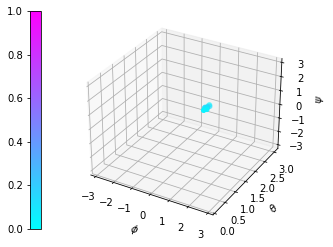

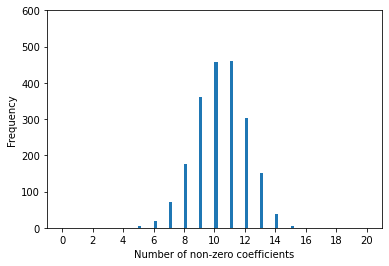

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 10.3251953125 non-zero coefficients | std = 1.6620505621755397
2022-05-04 16:54:45,414 INFO MSE deviation of the 1:th estimated GD-refined rotations using register_rotations : 1.124853417256822


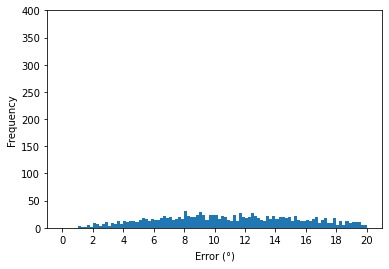

On average distance is 32.4641130675285 degrees | std = 43.24581309608484
integrated (averaged) density = 1.0000000000000426


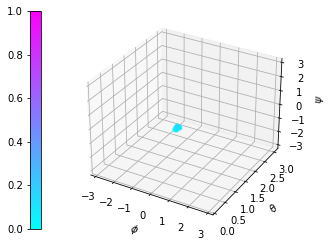

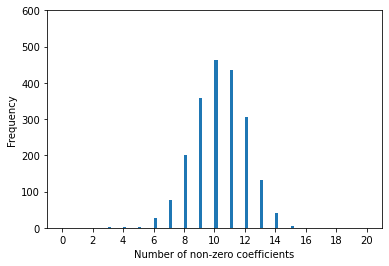

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 10.24609375 non-zero coefficients | std = 1.696729498538567
2022-05-04 16:54:48,888 INFO MSE deviation of the 2:th estimated GD-refined rotations using register_rotations : 0.01985589078337297


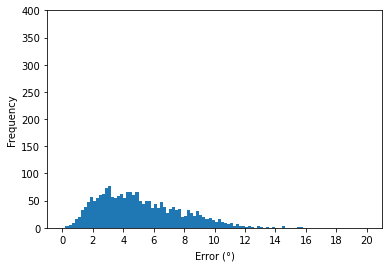

On average distance is 5.0573958582443215 degrees | std = 2.658711071224336
integrated (averaged) density = 1.0000000000000249


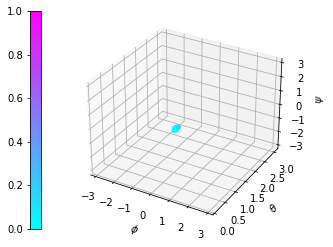

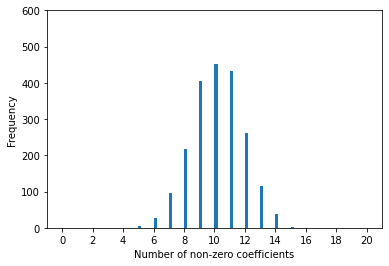

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 10.09814453125 non-zero coefficients | std = 1.6833387566784404
2022-05-04 16:54:52,022 INFO MSE deviation of the 3:th estimated GD-refined rotations using register_rotations : 0.005751124076520032


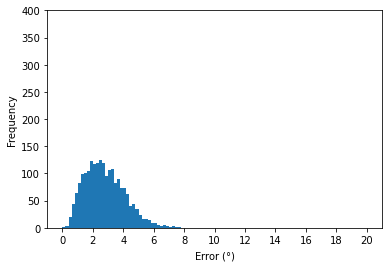

On average distance is 2.7802327355307943 degrees | std = 1.3093311044832723
integrated (averaged) density = 0.999999999999968


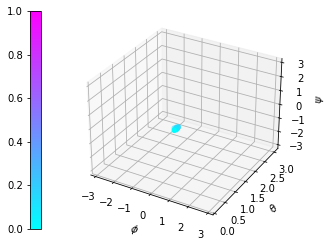

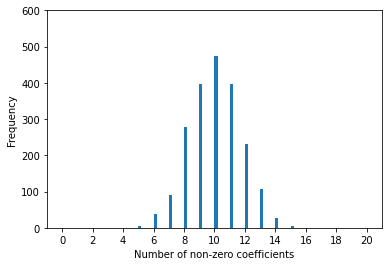

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.9501953125 non-zero coefficients | std = 1.6991668342464277
2022-05-04 16:54:55,203 INFO MSE deviation of the 4:th estimated GD-refined rotations using register_rotations : 0.0028448547638582457


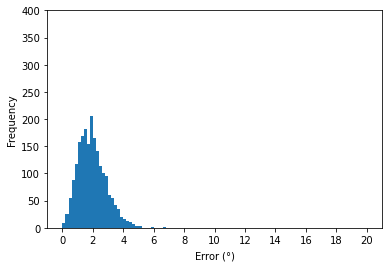

On average distance is 1.9548865593118927 degrees | std = 0.9214122163350242
integrated (averaged) density = 1.0


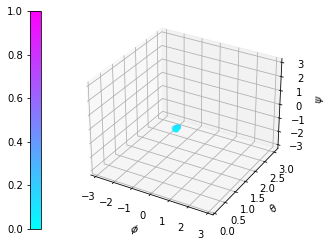

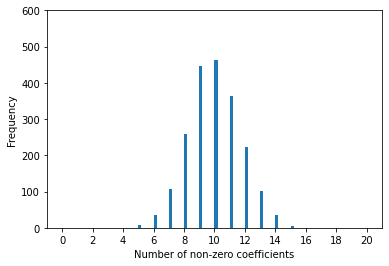

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.91650390625 non-zero coefficients | std = 1.7185684801829955
2022-05-04 16:54:58,271 INFO MSE deviation of the 5:th estimated GD-refined rotations using register_rotations : 0.0019855612675276145


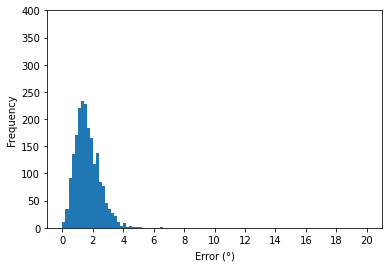

On average distance is 1.6277546679370096 degrees | std = 0.7810572409349408
integrated (averaged) density = 0.9999999999999787


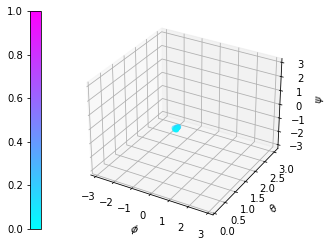

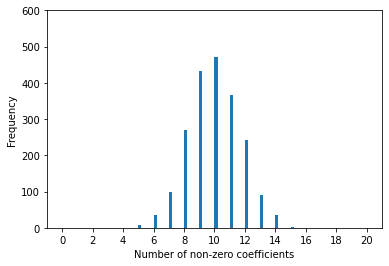

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.91455078125 non-zero coefficients | std = 1.694725040313329
2022-05-04 16:55:01,986 INFO MSE deviation of the 6:th estimated GD-refined rotations using register_rotations : 0.001684388329079082


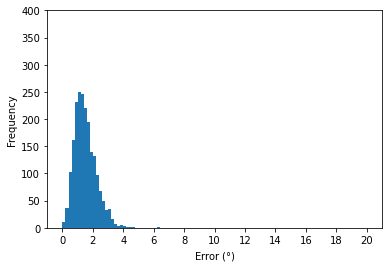

On average distance is 1.4981765719976463 degrees | std = 0.7215398747700729
integrated (averaged) density = 0.9999999999999964


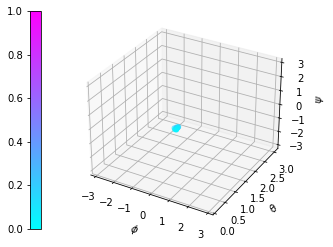

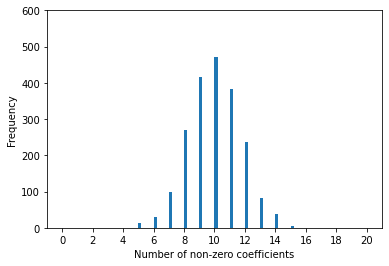

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.91796875 non-zero coefficients | std = 1.7142296736503653
2022-05-04 16:55:05,876 INFO MSE deviation of the 7:th estimated GD-refined rotations using register_rotations : 0.0015790561076647902


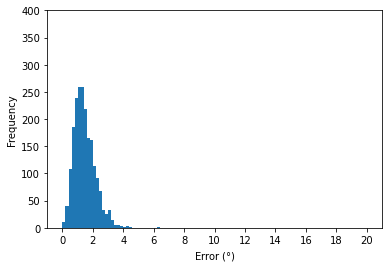

On average distance is 1.4500136121239846 degrees | std = 0.6997700750436366
integrated (averaged) density = 1.0000000000000036


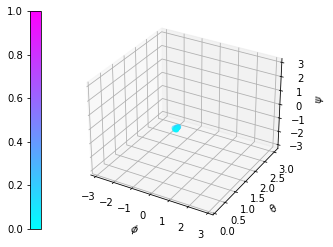

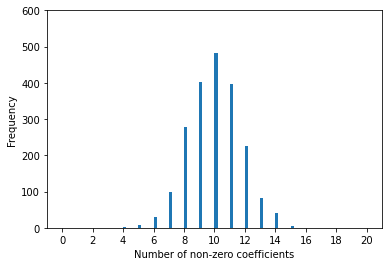

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.9296875 non-zero coefficients | std = 1.697003764681667
2022-05-04 16:55:09,388 INFO MSE deviation of the 8:th estimated GD-refined rotations using register_rotations : 0.0015362162776884592


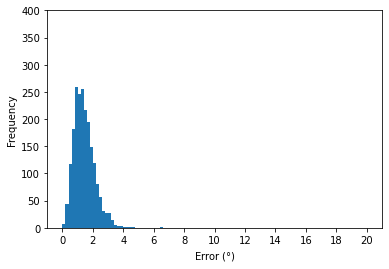

On average distance is 1.430272274705749 degrees | std = 0.6900765404402931
integrated (averaged) density = 0.9999999999999893


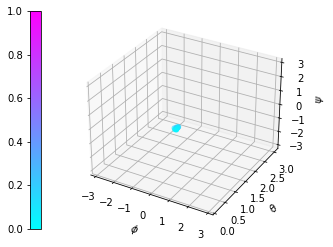

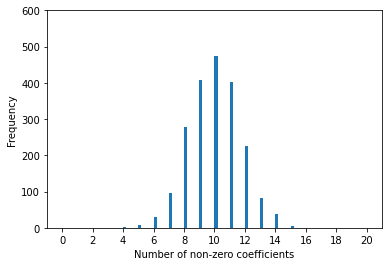

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.9287109375 non-zero coefficients | std = 1.6906209272240396
2022-05-04 16:55:13,240 INFO MSE deviation of the 9:th estimated GD-refined rotations using register_rotations : 0.0015174936689248669


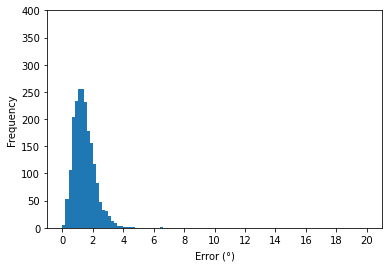

On average distance is 1.4214111729810055 degrees | std = 0.6861031568183661
integrated (averaged) density = 1.0000000000000142


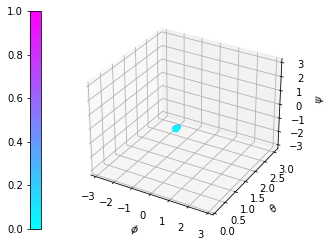

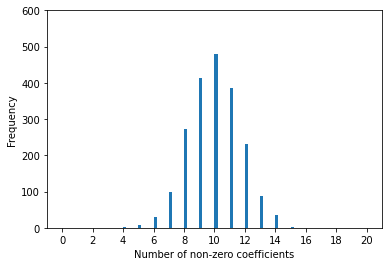

Predicted number of non-zero coefficients is between 8.12932897694694 and 15.715472815577318
On average 9.9208984375 non-zero coefficients | std = 1.6922943391473182
2022-05-04 16:55:17,005 INFO MSE deviation of the 10:th estimated GD-refined rotations using register_rotations : 0.0015094849875300846


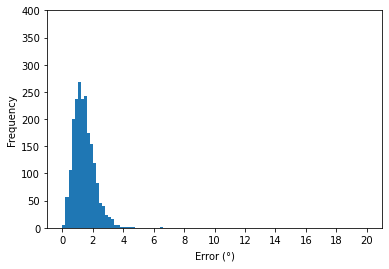

On average distance is 1.417423918101052 degrees | std = 0.6847695680582708
2022-05-04 16:55:17,769 WARNING The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-05-04 16:55:17,770 WARNING The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


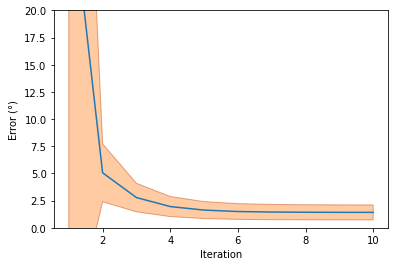

2022-05-04 16:55:18,048 WARNING The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-05-04 16:55:18,050 WARNING The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-05-04 16:55:18,050 WARNING The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


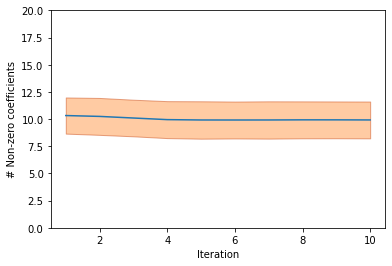

In [5]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
                mr_repeat=mr_repeat,
                hist_drange=20,
                hist_dvrange=400,
                hist_Jrange=20,
                hist_Jvrange=600,
                results_folder=results_path #?
                )
